In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [155]:
DFIM = pd.read_csv('DFIM_IR_Final.txt',sep='\t')
ATTN = pd.read_csv('ATTN_IR_Final.txt',sep='\t')

### Individual TF Analysis

In [156]:
DFIM.head()

,Unnamed: 0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,0,1530,filter60<-->filter175,10284,M6547_1.02,0.008735,M4459_1.02,0.002356,224.0,166.0,...,2.398641e-28,1.609822e-26,ZFX,EGR1,ZFX$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M6547_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF
1,1,706,filter24<-->filter175,4650,M4604_1.02,0.000801,M4459_1.02,0.002356,301.0,77.0,...,6.116077e-19,4.067845e-18,ZNF263,EGR1,ZNF263$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF
2,2,1527,filter60<-->filter158,10267,M6547_1.02,0.008735,M4459_1.02,0.000001,518.0,19.0,...,9.608552e-26,3.089018e-24,ZFX,EGR1,ZFX$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M6547_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF
3,3,670,filter24<-->filter60,4535,M4604_1.02,0.000801,M6547_1.02,0.008735,9.0,10.0,...,2.530757e-30,3.147629e-28,ZNF263,ZFX,ZNF263$\longleftrightarrow$ZFX,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M6547_1.02,C2H2 ZF:C2H2 ZF
4,4,703,filter24<-->filter158,4633,M4604_1.02,0.000801,M4459_1.02,0.000001,10.0,31.0,...,1.502937e-23,2.810979e-22,ZNF263,EGR1,ZNF263$\longleftrightarrow$EGR1,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF


In [157]:
#Exact TAL-GATA interactions 13 vs 18 in our ATTN model
DFIM[(DFIM['familyOnlyInt'].str.contains('GATA')) & (DFIM['familyOnlyInt'].str.contains('bHLH'))]

,Unnamed: 0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt


In [158]:
#DFIM[DFIM['']]

In [159]:
ATTN.head()

,Unnamed: 0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt
0,0,514,filter27<-->filter35,5029,M0609_1.02,0.012142,M4459_1.02,0.000013,156.0,348.0,...,1.034545e-27,9.803547e-25,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
1,1,782,filter35<-->filter39,6373,M4459_1.02,0.000013,M4604_1.02,0.000596,6.0,12.0,...,2.916165e-20,3.917818e-18,EGR1,ZNF263,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4459_1.02:M4604_1.02,C2H2 ZF:C2H2 ZF
2,2,525,filter27<-->filter55,5049,M0609_1.02,0.012142,M4459_1.02,0.000014,150.0,114.0,...,2.605547e-31,7.407199e-28,DNMT1,EGR1,DNMT1$\longleftrightarrow$EGR1,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4459_1.02,CxxC:C2H2 ZF
3,3,516,filter27<-->filter39,5033,M0609_1.02,0.012142,M4604_1.02,0.000596,48.0,18.0,...,1.207681e-10,1.732722e-09,DNMT1,ZNF263,DNMT1$\longleftrightarrow$ZNF263,CxxC,C2H2 ZF,CxxC$\longleftrightarrow$C2H2 ZF,M0609_1.02:M4604_1.02,CxxC:C2H2 ZF
4,4,918,filter39<-->filter55,7035,M4604_1.02,0.000596,M4459_1.02,0.000014,504.0,78.0,...,7.187193e-24,2.270240e-21,ZNF263,EGR1,EGR1$\longleftrightarrow$ZNF263,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF,M4604_1.02:M4459_1.02,C2H2 ZF:C2H2 ZF


In [160]:
#Exact TAL-GATA interactions 13 vs 18 in our ATTN model
ATTN[(ATTN['familyOnlyInt'].str.contains('GATA')) & (ATTN['familyOnlyInt'].str.contains('bHLH'))]

,Unnamed: 0,index,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,...,pval,adjusted_pval,TF1,TF2,TF_interaction,TF1_Family,TF2_Family,Family_Interaction,motifsOnlyInt,familyOnlyInt


In [161]:
DFIM_unique = DFIM['TF_interaction'].value_counts()

In [162]:
ATTN_unique = ATTN['TF_interaction'].value_counts()

In [163]:
intersected = set.intersection(set(DFIM_unique.keys()),set(ATTN_unique.keys()))

In [164]:
len(set(DFIM_unique.keys())),len(set(ATTN_unique.keys())),len(intersected)

(253, 241, 50)

#### For DFIM TFs

In [165]:
final_list = [['interaction','count','in_both']]
for key in DFIM_unique.keys():
    rev_key = key.split('$\\longleftrightarrow$')[1]+'$\\longleftrightarrow$'+key.split('$\\longleftrightarrow$')[0]
    if key in ATTN_unique or rev_key in ATTN_unique:
        final_list.append([key,DFIM_unique[key],'b'])
    else:
        final_list.append([key,DFIM_unique[key],'r'])
final_list = np.asarray(final_list)
df_DFIM = pd.DataFrame(final_list[1:],columns=final_list[0])   
df_DFIM['count'] = df_DFIM['count'].apply(lambda x: int(x))

In [166]:
#key.split('$\\longleftrightarrow$')

In [167]:
df_DFIM.head()

,interaction,count,in_both
0,ZNF263$\longleftrightarrow$EGR1,120,b
1,SP7$\longleftrightarrow$EGR1,84,b
2,SP7$\longleftrightarrow$ZNF263,70,b
3,HHEX$\longleftrightarrow$EGR1,60,b
4,ZFX$\longleftrightarrow$EGR1,60,b


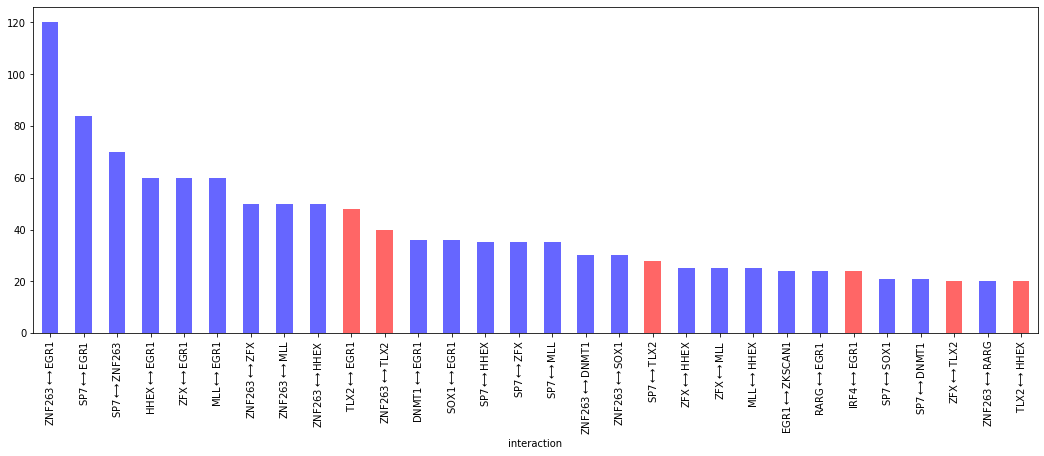

In [168]:
df_DFIM[:30].plot(kind='bar',x='interaction',y='count',color=df_DFIM['in_both'],figsize=(18,6),legend=None,alpha=0.6)

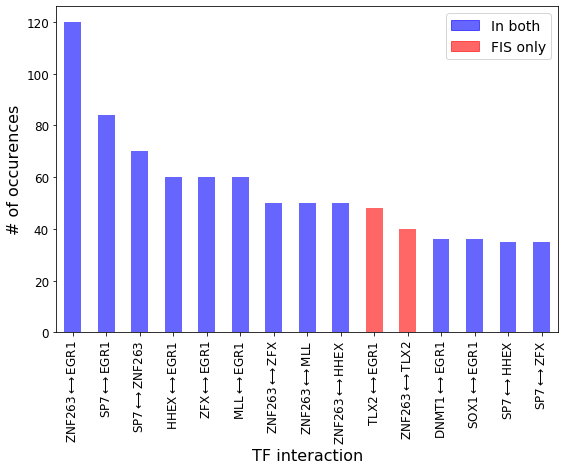

In [169]:
ax = df_DFIM[:15].plot(kind='bar',x='interaction',y='count',
                       color=df_DFIM['in_both'],figsize=(9,6),
                       legend=False,alpha=0.6,fontsize=12)

ax.set_xlabel("TF interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)

NA = mpatches.Patch(color='b', alpha = 0.6, label='In both')
EU = mpatches.Patch(color='r', alpha = 0.6, label='FIS only')
plt.legend(handles=[NA,EU], loc=1,fontsize=14)
plt.savefig('SATORI-vs-FIS_IR_indTF.pdf',bbox_inches='tight')

#### For ATTN TFs

In [170]:
final_list = [['interaction','count','in_both']]
for key in ATTN_unique.keys():
    rev_key = key.split('$\\longleftrightarrow$')[1]+'$\\longleftrightarrow$'+key.split('$\\longleftrightarrow$')[0]
    if key in DFIM_unique or rev_key in DFIM_unique:
        final_list.append([key,ATTN_unique[key],'b'])
    else:
        final_list.append([key,ATTN_unique[key],'r'])
final_list = np.asarray(final_list)
df_ATTN = pd.DataFrame(final_list[1:],columns=final_list[0])   
df_ATTN['count'] = df_ATTN['count'].apply(lambda x: int(x))

In [171]:
df_ATTN.head()

,interaction,count,in_both
0,EGR1$\longleftrightarrow$ZFX,123,b
1,EGR1$\longleftrightarrow$ZNF263,111,b
2,ZNF263$\longleftrightarrow$ZFX,90,b
3,DNMT1$\longleftrightarrow$EGR1,68,b
4,DNMT1$\longleftrightarrow$ZNF263,55,b


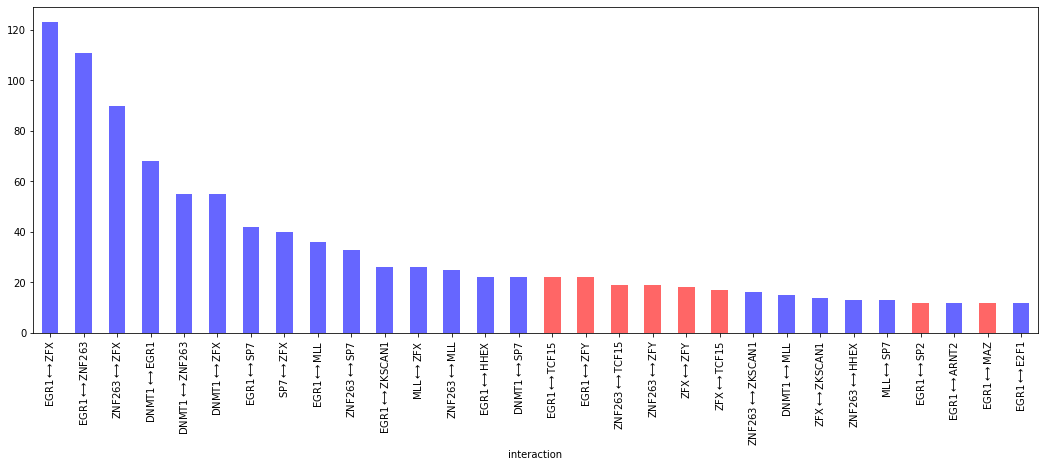

In [172]:
df_ATTN[:30].plot(kind='bar',x='interaction',y='count',color=df_ATTN['in_both'],figsize=(18,6),legend=None,alpha=0.6)

In [173]:
df_ATTN['count'].median()

2.0

In [174]:
df_DFIM['in_both'].value_counts()

r    151
b    102
Name: in_both, dtype: int64

In [175]:
df_ATTN['in_both'].value_counts()

r    139
b    102
Name: in_both, dtype: int64

### TF Family Analysis

In [176]:
DFIM_unique = DFIM['Family_Interaction'].value_counts()

In [177]:
ATTN_unique = ATTN['Family_Interaction'].value_counts()

In [178]:
intersected = set.intersection(set(DFIM_unique.keys()),set(ATTN_unique.keys()))

In [179]:
len(set(DFIM_unique.keys())),len(set(ATTN_unique.keys())),len(intersected)

(59, 34, 17)

#### For DFIM TFs

In [180]:
final_list = [['interaction','count','in_both']]
for key in DFIM_unique.keys():
    rev_key = key.split('$\\longleftrightarrow$')[1]+'$\\longleftrightarrow$'+key.split('$\\longleftrightarrow$')[0]
    if key in ATTN_unique or rev_key in ATTN_unique:
        final_list.append([key,DFIM_unique[key],'b'])
    else:
        final_list.append([key,DFIM_unique[key],'r'])
final_list = np.asarray(final_list)
df_DFIM = pd.DataFrame(final_list[1:],columns=final_list[0])   
df_DFIM['count'] = df_DFIM['count'].apply(lambda x: int(x))

In [181]:
#key.split('$\\longleftrightarrow$')

In [182]:
df_DFIM.head()

,interaction,count,in_both
0,C2H2 ZF$\longleftrightarrow$C2H2 ZF,598,b
1,Homeodomain$\longleftrightarrow$C2H2 ZF,428,b
2,CxxC$\longleftrightarrow$C2H2 ZF,312,b
3,Sox$\longleftrightarrow$C2H2 ZF,117,b
4,CxxC$\longleftrightarrow$Homeodomain,88,b


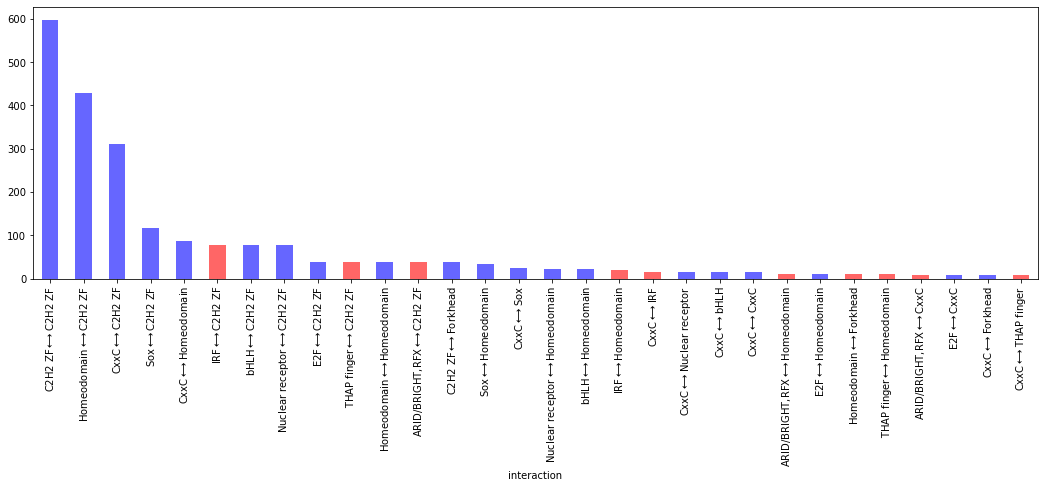

In [183]:
df_DFIM[:30].plot(kind='bar',x='interaction',y='count',color=df_DFIM['in_both'],figsize=(18,5),legend=None,alpha=0.6)

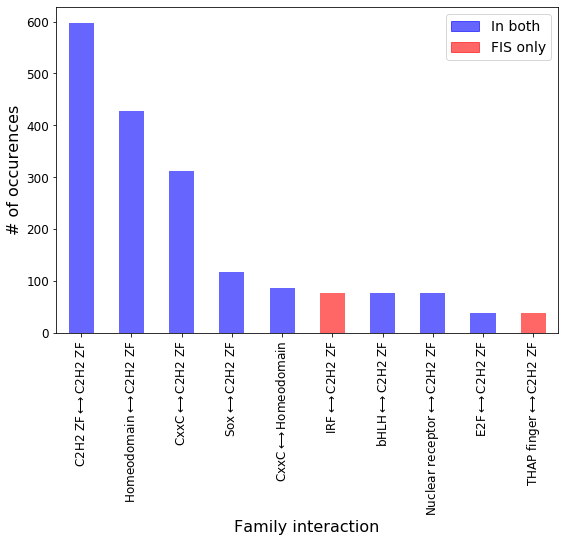

In [184]:
ax = df_DFIM[:10].plot(kind='bar',x='interaction',y='count',
                       color=df_DFIM['in_both'],figsize=(9,6),
                       legend=False,alpha=0.6,fontsize=12)

ax.set_xlabel("Family interaction",fontsize=16)
ax.set_ylabel("# of occurences",fontsize=16)

NA = mpatches.Patch(color='b', alpha = 0.6, label='In both')
EU = mpatches.Patch(color='r', alpha = 0.6, label='FIS only')
plt.legend(handles=[NA,EU], loc=1,fontsize=14)
plt.savefig('SATORI-vs-FIS_IR_famTF.pdf',bbox_inches='tight')

In [185]:
df_DFIM[(df_DFIM['interaction'].str.contains('GATA')) & (df_DFIM['interaction'].str.contains('bHLH'))]

,interaction,count,in_both


#### For ATTN TFs

In [186]:
final_list = [['interaction','count','in_both']]
for key in ATTN_unique.keys():
    rev_key = key.split('$\\longleftrightarrow$')[1]+'$\\longleftrightarrow$'+key.split('$\\longleftrightarrow$')[0]
    if key in DFIM_unique or rev_key in DFIM_unique:
        final_list.append([key,ATTN_unique[key],'b'])
    else:
        final_list.append([key,ATTN_unique[key],'r'])
final_list = np.asarray(final_list)
df_ATTN = pd.DataFrame(final_list[1:],columns=final_list[0])   
df_ATTN['count'] = df_ATTN['count'].apply(lambda x: int(x))

In [187]:
df_ATTN.head()

,interaction,count,in_both
0,C2H2 ZF$\longleftrightarrow$C2H2 ZF,727,b
1,CxxC$\longleftrightarrow$C2H2 ZF,379,b
2,C2H2 ZF$\longleftrightarrow$bHLH,136,b
3,C2H2 ZF$\longleftrightarrow$Homeodomain,121,b
4,C2H2 ZF$\longleftrightarrow$Nuclear receptor,86,b


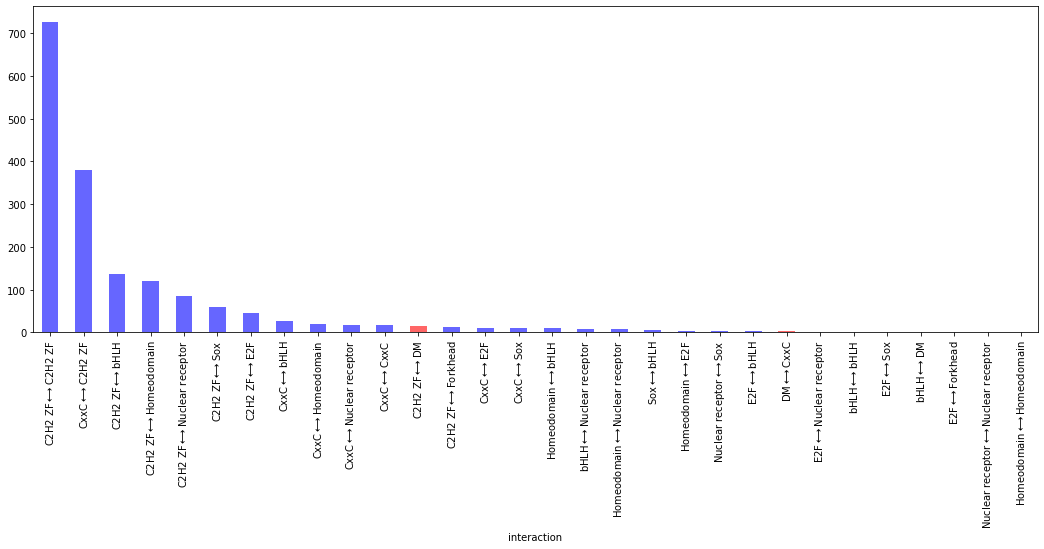

In [188]:
df_ATTN[:30].plot(kind='bar',x='interaction',y='count',color=df_ATTN['in_both'],figsize=(18,6),legend=None,alpha=0.6)

In [189]:
df_ATTN[(df_ATTN['interaction'].str.contains('GATA')) & (df_ATTN['interaction'].str.contains('bHLH'))]

,interaction,count,in_both


In [190]:
df_DFIM['in_both'].value_counts()

r    31
b    28
Name: in_both, dtype: int64

In [191]:
df_ATTN['in_both'].value_counts()

b    28
r     6
Name: in_both, dtype: int64